In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from IPython.display import display

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

#Loading csv data for statistical analysis and Eda

In [6]:

data_Benin_malanville = pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Benin/solar-measurements_benin-malanville_qc.csv", encoding='latin-1',low_memory=False)


In [7]:
Converted_to_numeric = data_Benin_malanville.apply(pd.to_numeric, errors='coerce')


In [8]:
Converted_to_numeric.describe()



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,0.0,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,NaN,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,NaN,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,NaN,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,NaN,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,NaN,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,NaN,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [9]:
null_counts = data_Benin_malanville[["GHI", "DNI", "DHI"]].isnull().sum()
print(null_counts)

GHI    0
DNI    0
DHI    0
dtype: int64


In [10]:
# Select columns of interest and compute summary statistics
summary_statistics = data_Benin_malanville[['GHI', 'DNI', 'DHI']].describe()

# Print summary statistics
print("\nSummary Statistics:")
print(summary_statistics)



Summary Statistics:
           GHI     DNI     DHI
count   525601  525601  525601
unique    8610    8906    6996
top       -1.5    -0.3    -1.4
freq     15339   47152   15025


In [11]:
# Find the column name(s) corresponding to the top values
top_values = {'GHI': -1.5, 'DNI': -0.3, 'DHI': -1.4}  # Assuming these are the top values in each column

for col, top_value in top_values.items():
    freq = summary_statistics.loc['freq', col]
    print(f"Column: {col}, Top Value: {top_value}, Frequency: {freq}")


Column: GHI, Top Value: -1.5, Frequency: 15339
Column: DNI, Top Value: -0.3, Frequency: 47152
Column: DHI, Top Value: -1.4, Frequency: 15025


In [12]:
# From tha output of the above we conclude that there is no missing value
# There is anomaly of error in the data bacuase normally the GHI, DNI and DHI should be positive

In [13]:
negative_values_count = (Converted_to_numeric[['GHI', 'DNI', 'DHI']] < 0).sum()
print("\nNegative Values Count:")
print(negative_values_count)


Negative Values Count:
GHI    258847
DNI    275987
DHI    259182
dtype: int64


In [14]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [15]:
time_index = np.array(data_Benin_malanville.index)
print(data_Benin_malanville.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


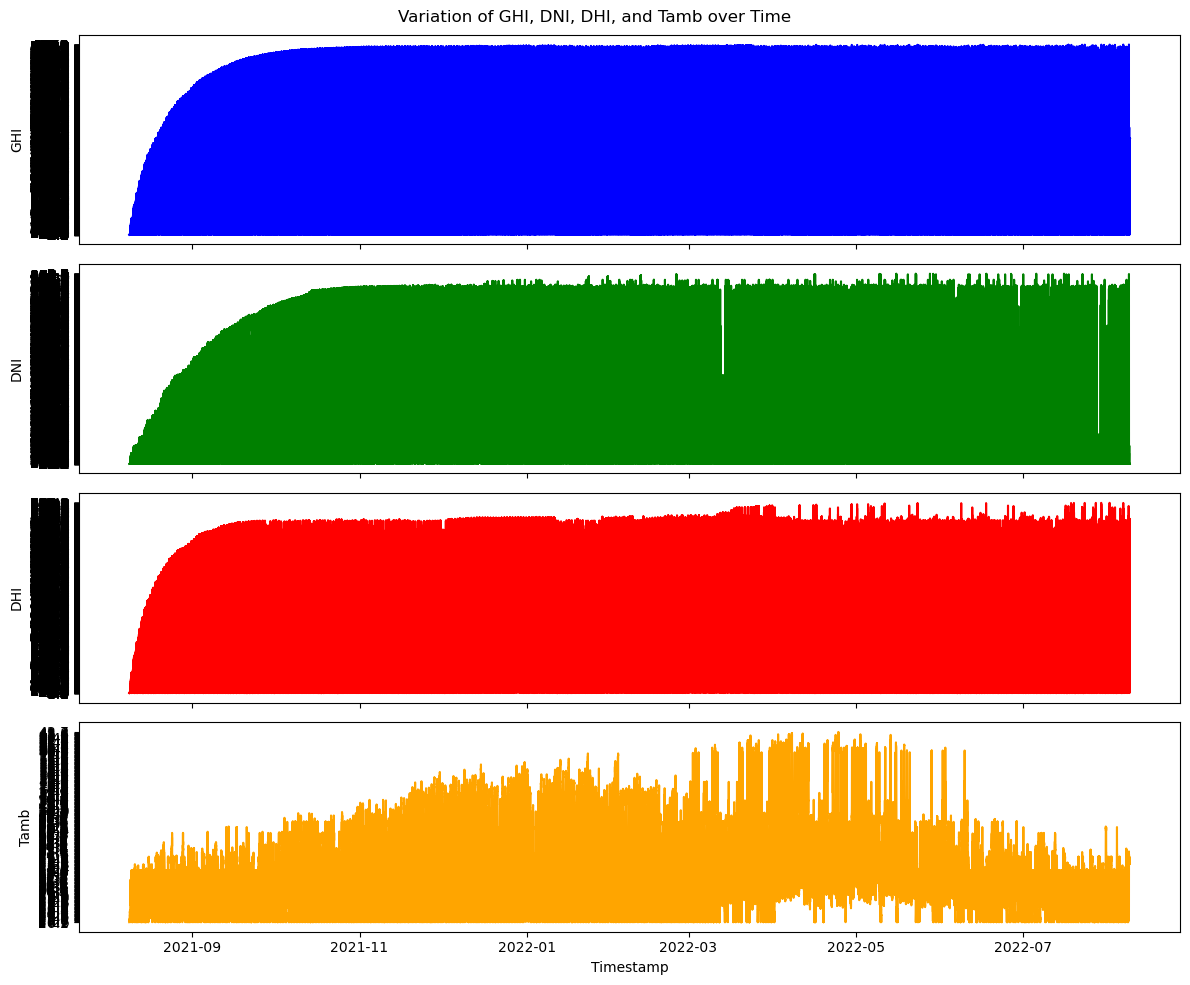

In [16]:
# Filter out rows with the placeholder string from the 'Timestamp' column
data_Benin_malanville = data_Benin_malanville[data_Benin_malanville['Timestamp'] != 'yyyy-mm-dd hh:mm']
data_Benin_malanville['Timestamp'] = pd.to_datetime(data_Benin_malanville['Timestamp'])

# Create subplots for each variable
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot GHI
axs[0].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['GHI'].to_numpy(), label='GHI', color='blue')
axs[0].set_ylabel('GHI')

# Plot DNI
axs[1].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['DNI'].to_numpy(), label='DNI', color='green')
axs[1].set_ylabel('DNI')

# Plot DHI
axs[2].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['DHI'].to_numpy(), label='DHI', color='red')
axs[2].set_ylabel('DHI')

# Plot Tamb
axs[3].plot(data_Benin_malanville['Timestamp'].to_numpy(), data_Benin_malanville['Tamb'].to_numpy(), label='Tamb', color='orange')
axs[3].set_ylabel('Tamb')

# Add common xlabel and title
plt.xlabel('Timestamp')
plt.suptitle('Variation of GHI, DNI, DHI, and Tamb over Time')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [17]:
correlation_matrix = data_Benin_malanville[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']].corr()
# Print correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,GHI,DHI,DNI,TModA,TModB
GHI,1.000000,0.849989,0.882376,0.920127,0.874338
DHI,0.849989,1.000000,0.546602,0.825012,0.777829
DNI,0.882376,0.546602,1.000000,0.790340,0.756007
TModA,0.920127,0.825012,0.790340,1.000000,0.983443
TModB,0.874338,0.777829,0.756007,0.983443,1.000000


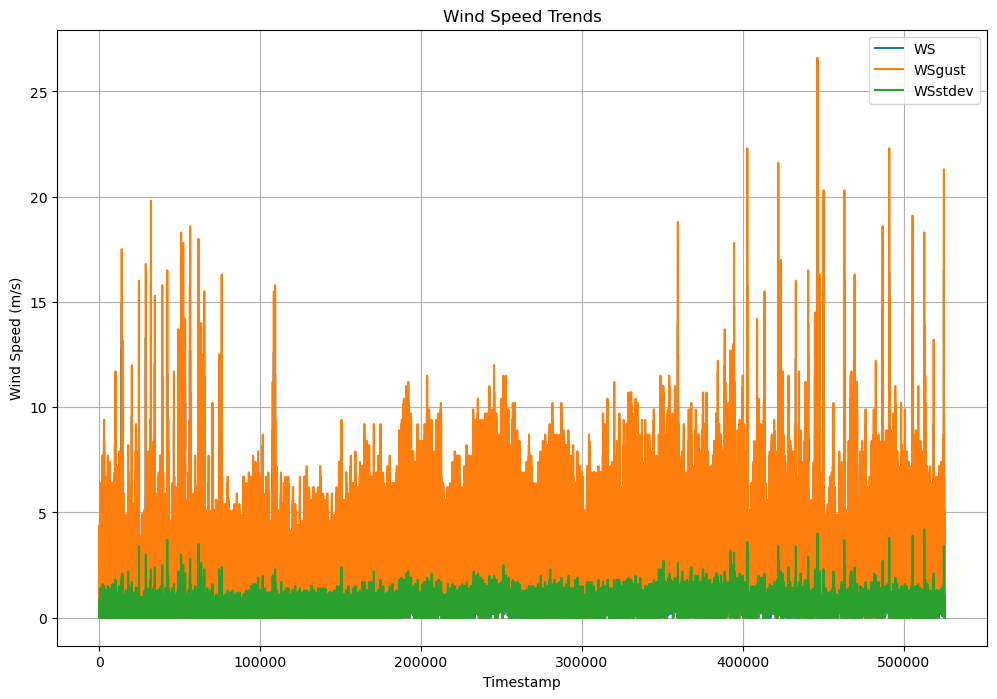

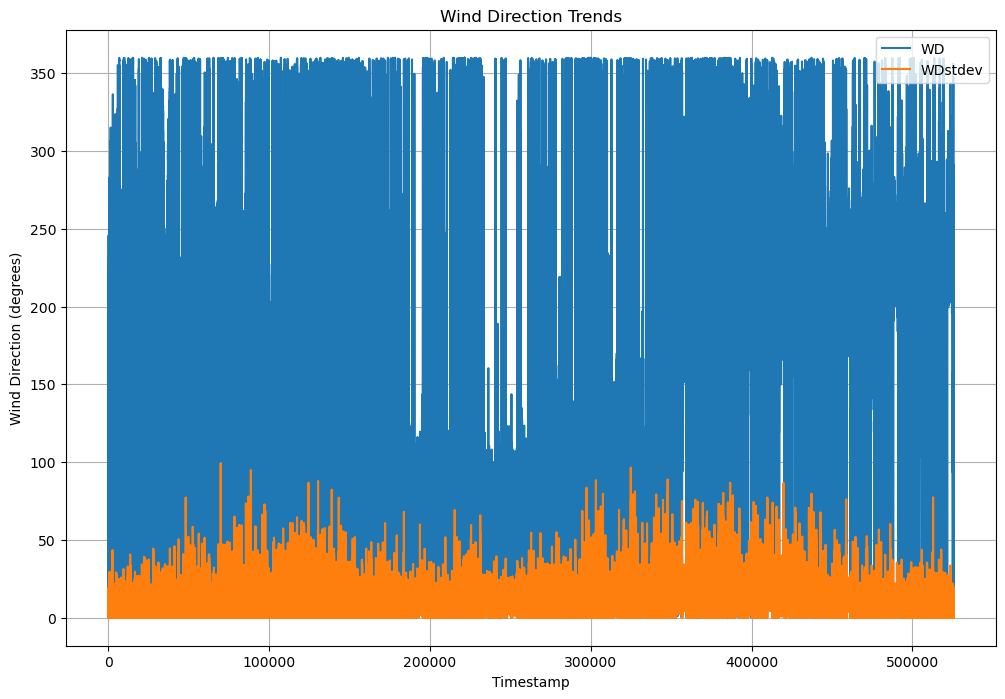

Wind Speed Summary Statistics:
[[ 0.   0.   0. ]
 [ 1.   1.3  0.4]
 [ 1.9  2.6  0.5]
 [ 3.1  4.1  0.6]
 [19.5 26.6  4.2]]

Wind Direction Summary Statistics:
[[  0.    0. ]
 [ 59.    3.7]
 [181.    8.6]
 [235.1  12.3]
 [360.   99.4]]


In [18]:
# Convert non-numeric values to NaN and convert DataFrame columns to numpy arrays
ws_data = pd.to_numeric(data_Benin_malanville['WS'], errors='coerce').dropna().to_numpy()
wsgust_data = pd.to_numeric(data_Benin_malanville['WSgust'], errors='coerce').dropna().to_numpy()
wsstdev_data = pd.to_numeric(data_Benin_malanville['WSstdev'], errors='coerce').dropna().to_numpy()
wd_data = pd.to_numeric(data_Benin_malanville['WD'], errors='coerce').dropna().to_numpy()
wdstdev_data = pd.to_numeric(data_Benin_malanville['WDstdev'], errors='coerce').dropna().to_numpy()

# Plot wind speed data
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville.index.to_numpy()[:len(ws_data)], ws_data, label='WS')
plt.plot(data_Benin_malanville.index.to_numpy()[:len(wsgust_data)], wsgust_data, label='WSgust')
plt.plot(data_Benin_malanville.index.to_numpy()[:len(wsstdev_data)], wsstdev_data, label='WSstdev')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Trends')
plt.legend()
plt.grid(True)
plt.show()

# Plot wind direction data
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville.index.to_numpy()[:len(wd_data)], wd_data, label='WD')
plt.plot(data_Benin_malanville.index.to_numpy()[:len(wdstdev_data)], wdstdev_data, label='WDstdev')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (degrees)')
plt.title('Wind Direction Trends')
plt.legend()
plt.grid(True)
plt.show()

# Calculate summary statistics for wind speed
wind_speed_stats = np.vstack((ws_data, wsgust_data, wsstdev_data)).T
wind_speed_stats_summary = np.vstack((np.min(wind_speed_stats, axis=0),
                                      np.percentile(wind_speed_stats, 25, axis=0),
                                      np.median(wind_speed_stats, axis=0),
                                      np.percentile(wind_speed_stats, 75, axis=0),
                                      np.max(wind_speed_stats, axis=0)))
print("Wind Speed Summary Statistics:")
print(wind_speed_stats_summary)

# Calculate summary statistics for wind direction
wind_direction_stats = np.vstack((wd_data, wdstdev_data)).T
wind_direction_stats_summary = np.vstack((np.min(wind_direction_stats, axis=0),
                                          np.percentile(wind_direction_stats, 25, axis=0),
                                          np.median(wind_direction_stats, axis=0),
                                          np.percentile(wind_direction_stats, 75, axis=0),
                                          np.max(wind_direction_stats, axis=0)))
print("\nWind Direction Summary Statistics:")
print(wind_direction_stats_summary)


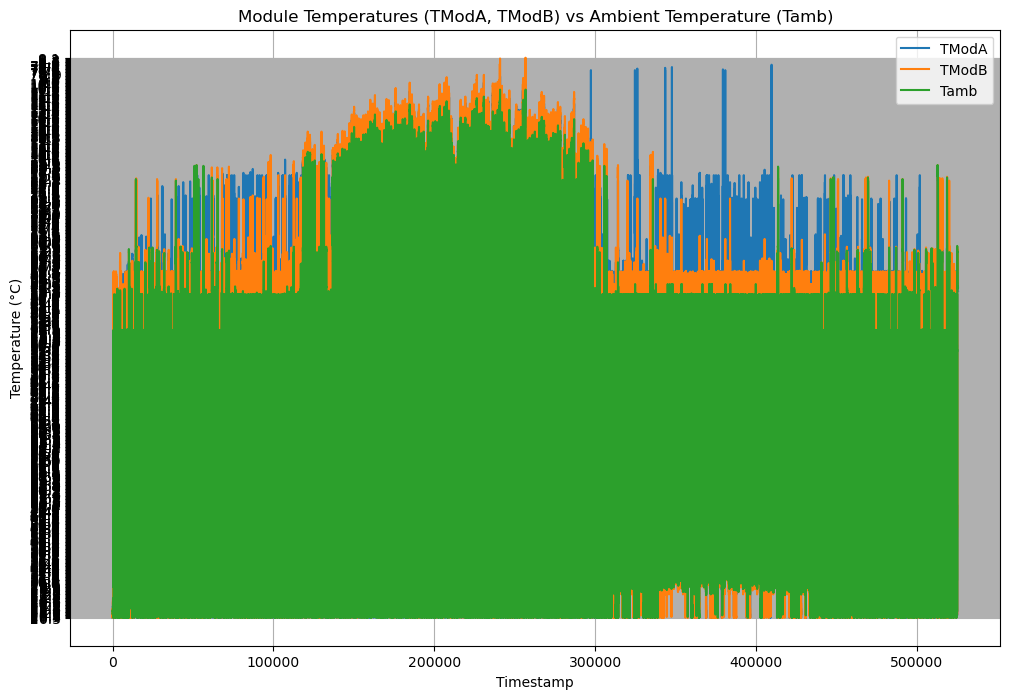

Correlation between temperatures:
          TModA     TModB      Tamb
TModA  1.000000  0.983443  0.761701
TModB  0.983443  1.000000  0.823353
Tamb   0.761701  0.823353  1.000000
        TModA_diff  TModB_diff
1              0.1         0.0
2              0.1         0.0
3              0.2         0.0
4              0.2         0.1
5              0.2         0.1
...            ...         ...
525596         0.4        -0.2
525597         0.4        -0.2
525598         0.4        -0.2
525599         0.4        -0.2
525600         0.4        -0.2

[525600 rows x 2 columns]


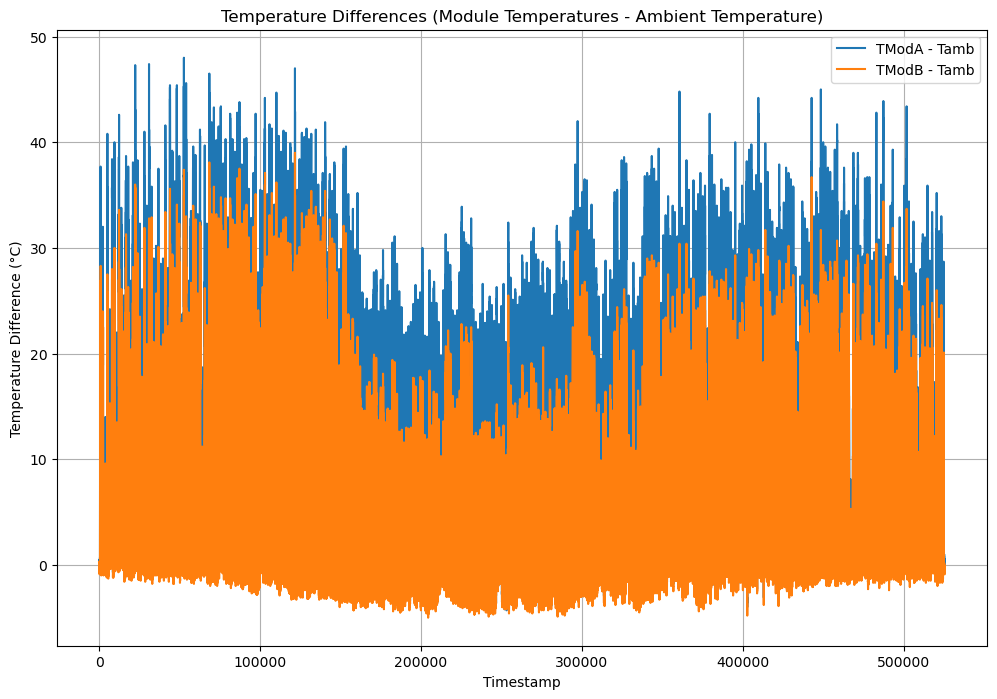

In [19]:
# Plot module temperatures and ambient temperature
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville.index.to_numpy(), data_Benin_malanville['TModA'].to_numpy(), label='TModA')
plt.plot(data_Benin_malanville.index.to_numpy(), data_Benin_malanville['TModB'].to_numpy(), label='TModB')
plt.plot(data_Benin_malanville.index.to_numpy(), data_Benin_malanville['Tamb'].to_numpy(), label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Module Temperatures (TModA, TModB) vs Ambient Temperature (Tamb)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation coefficients
temperature_correlation = data_Benin_malanville[['TModA', 'TModB', 'Tamb']].corr()
print("Correlation between temperatures:")
print(temperature_correlation)

# Convert temperature columns to numeric
data_Benin_malanville['TModA'] = pd.to_numeric(data_Benin_malanville['TModA'], errors='coerce')
data_Benin_malanville['TModB'] = pd.to_numeric(data_Benin_malanville['TModB'], errors='coerce')
data_Benin_malanville['Tamb'] = pd.to_numeric(data_Benin_malanville['Tamb'], errors='coerce')

# Calculate temperature differences
data_Benin_malanville['TModA_diff'] = data_Benin_malanville['TModA'] - data_Benin_malanville['Tamb']
data_Benin_malanville['TModB_diff'] = data_Benin_malanville['TModB'] - data_Benin_malanville['Tamb']
print(data_Benin_malanville[['TModA_diff', 'TModB_diff']])



# Plot temperature differences
plt.figure(figsize=(12, 8))
plt.plot(data_Benin_malanville.index.to_numpy(), data_Benin_malanville['TModA_diff'].to_numpy(), label='TModA - Tamb')
plt.plot(data_Benin_malanville.index.to_numpy(), data_Benin_malanville['TModB_diff'].to_numpy(), label='TModB - Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Temperature Difference (°C)')
plt.title('Temperature Differences (Module Temperatures - Ambient Temperature)')
plt.legend()
plt.grid(True)
plt.show()

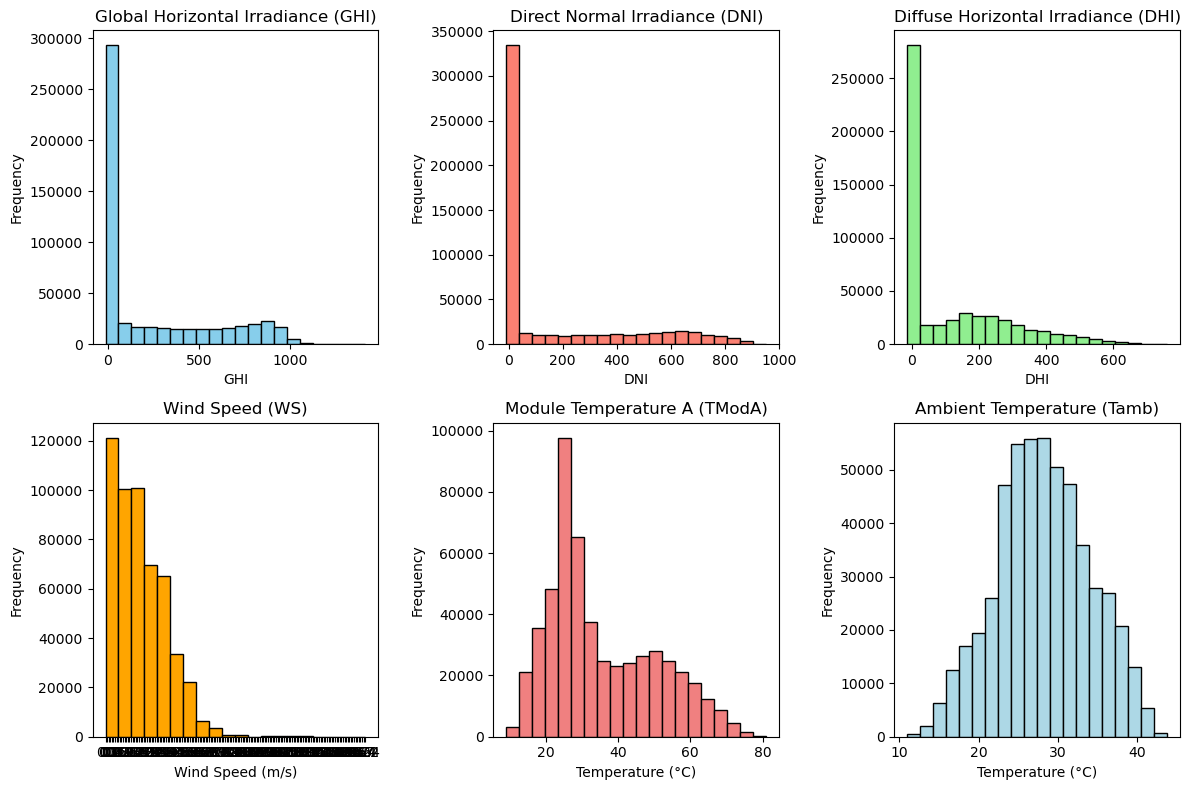

In [25]:
# Create histograms
plt.figure(figsize=(12, 8))

# Histogram for GHI
plt.subplot(2, 3, 1)
plt.hist(data_Benin_malanville['GHI'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Global Horizontal Irradiance (GHI)')

# Histogram for DNI
plt.subplot(2, 3, 2)
plt.hist(data_Benin_malanville['DNI'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('DNI')
plt.ylabel('Frequency')
plt.title('Direct Normal Irradiance (DNI)')

# Histogram for DHI
plt.subplot(2, 3, 3)
plt.hist(data_Benin_malanville['DHI'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('DHI')
plt.ylabel('Frequency')
plt.title('Diffuse Horizontal Irradiance (DHI)')

# Histogram for WS
plt.subplot(2, 3, 4)
plt.hist(data_Benin_malanville['WS'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Wind Speed (WS)')

# Histogram for TModA
plt.subplot(2, 3, 5)
plt.hist(data_Benin_malanville['TModA'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Module Temperature A (TModA)')

# Histogram for Tamb
plt.subplot(2, 3, 6)
plt.hist(data_Benin_malanville['Tamb'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Ambient Temperature (Tamb)')

plt.tight_layout()
plt.show()


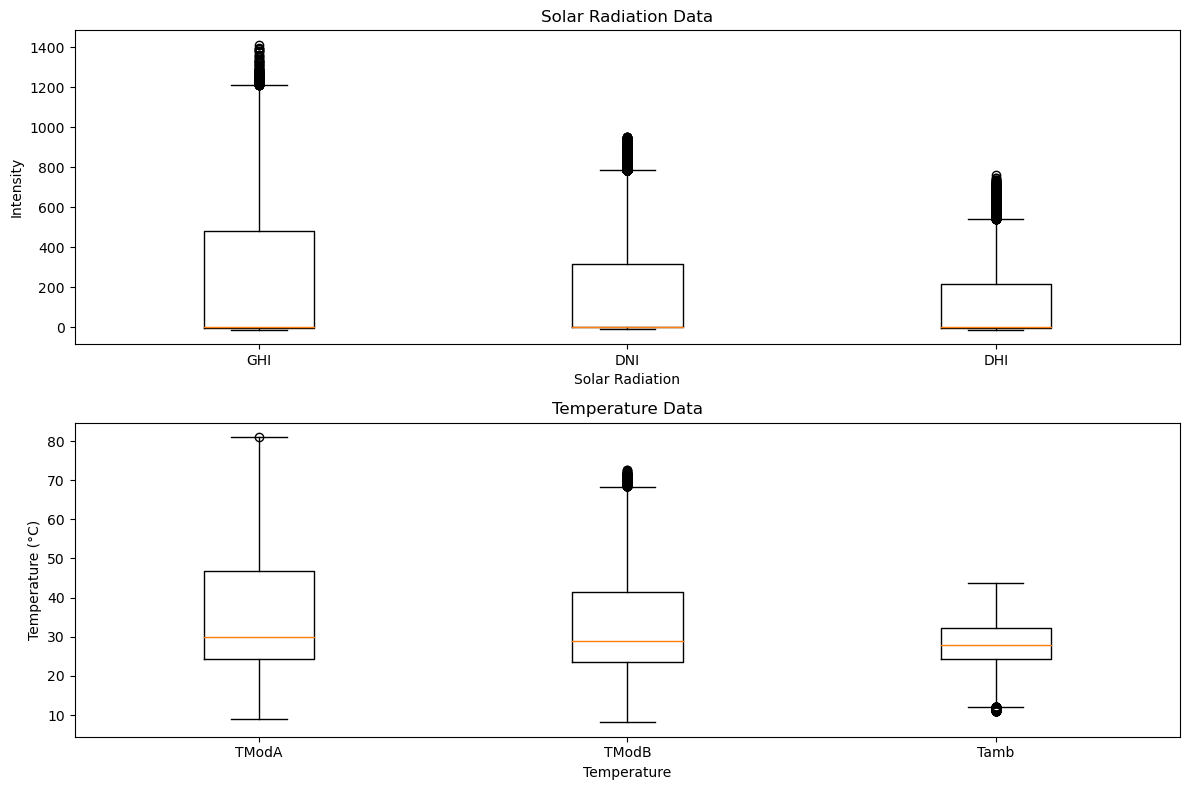

In [26]:
# Convert data to numeric type
data_Benin_malanville['GHI'] = pd.to_numeric(data_Benin_malanville['GHI'], errors='coerce')
data_Benin_malanville['DNI'] = pd.to_numeric(data_Benin_malanville['DNI'], errors='coerce')
data_Benin_malanville['DHI'] = pd.to_numeric(data_Benin_malanville['DHI'], errors='coerce')
data_Benin_malanville['TModA'] = pd.to_numeric(data_Benin_malanville['TModA'], errors='coerce')
data_Benin_malanville['TModB'] = pd.to_numeric(data_Benin_malanville['TModB'], errors='coerce')
data_Benin_malanville['Tamb'] = pd.to_numeric(data_Benin_malanville['Tamb'], errors='coerce')

plt.figure(figsize=(12, 8))

# Box plot for solar radiation
plt.subplot(2, 1, 1)
plt.boxplot([data_Benin_malanville['GHI'].dropna(), data_Benin_malanville['DNI'].dropna(), data_Benin_malanville['DHI'].dropna()], labels=['GHI', 'DNI', 'DHI'])
plt.xlabel('Solar Radiation')
plt.ylabel('Intensity')
plt.title('Solar Radiation Data')

# Box plot for temperature
plt.subplot(2, 1, 2)
plt.boxplot([data_Benin_malanville['TModA'].dropna(), data_Benin_malanville['TModB'].dropna(), data_Benin_malanville['Tamb'].dropna()], labels=['TModA', 'TModB', 'Tamb'])
plt.xlabel('Temperature')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Data')

plt.tight_layout()
plt.show()

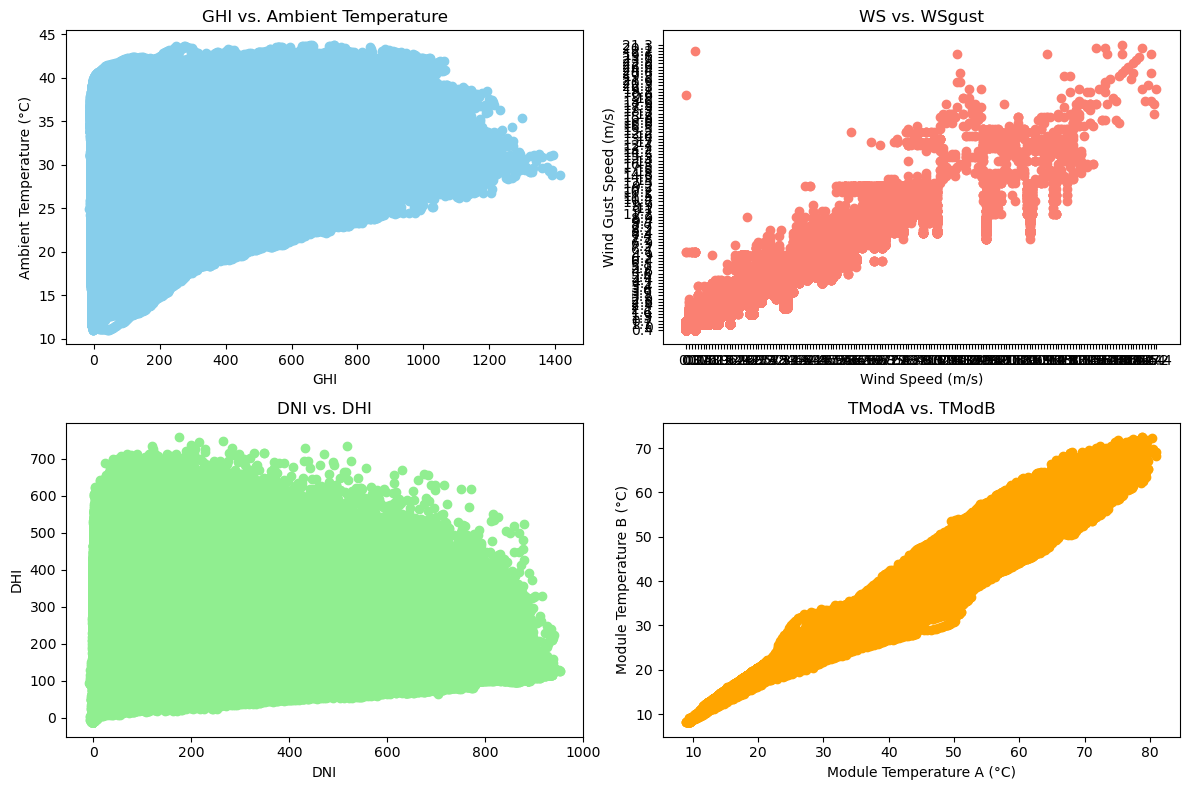

In [27]:
# Generate scatter plots
plt.figure(figsize=(12, 8))

# GHI vs. Tamb
plt.subplot(2, 2, 1)
plt.scatter(data_Benin_malanville['GHI'], data_Benin_malanville['Tamb'], color='skyblue')
plt.xlabel('GHI')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs. Ambient Temperature')

# WS vs. WSgust
plt.subplot(2, 2, 2)
plt.scatter(data_Benin_malanville['WS'], data_Benin_malanville['WSgust'], color='salmon')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Gust Speed (m/s)')
plt.title('WS vs. WSgust')

# DNI vs. DHI
plt.subplot(2, 2, 3)
plt.scatter(data_Benin_malanville['DNI'], data_Benin_malanville['DHI'], color='lightgreen')
plt.xlabel('DNI')
plt.ylabel('DHI')
plt.title('DNI vs. DHI')

# TModA vs. TModB
plt.subplot(2, 2, 4)
plt.scatter(data_Benin_malanville['TModA'], data_Benin_malanville['TModB'], color='orange')
plt.xlabel('Module Temperature A (°C)')
plt.ylabel('Module Temperature B (°C)')
plt.title('TModA vs. TModB')

plt.tight_layout()
plt.show()


In [28]:
# Step 1: Identify missing values
missing_values = data_Benin_malanville.isnull().sum()
print("Missing Values:")
print(missing_values)

# Step 2: Handle missing values in the Comments column
# For example, if the Comments column appears entirely null and doesn't provide valuable information, you can drop it
if 'Comments' in data_Benin_malanville.columns:
    data_Benin_malanville.drop('Comments', axis=1, inplace=True)

# Step 3: Handle anomalies (if any)
# You can use statistical methods or domain knowledge to identify anomalies and decide how to handle them

# After cleaning, you may want to check the dataset again to ensure that missing values and anomalies have been properly addressed
cleaned_missing_values = data_Benin_malanville.isnull().sum()
print("\nMissing Values after cleaning:")
print(cleaned_missing_values)


Missing Values:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
TModA_diff       0
TModB_diff       0
dtype: int64

Missing Values after cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
TModA_diff       0
TModB_diff       0
dtype: int64


In [ ]:
display(df)

In [145]:
# data_Benin_parakou =pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Benin/solar-measurements_benin-parakou_qc.csv",encoding='latin-1',low_memory=False)

In [147]:
# data_SierraLeone_kenema=pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Sirearra-Leone/solar-measurements_sierraleone-kenema_qc.csv" ,encoding='latin-1',low_memory=False)

In [148]:
data_Togo_togodapaong = pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Togo/solar-measurements_togo-dapaong_qc.csv" ,encoding='latin-1',low_memory=False)

In [149]:
# data_Togo_togodavie = pd.read_csv("/home/yadasa/Desktop/10-Academy-week-0/src/models/datasets/Togo/solar-measurements_togo-davie_qc.csv",encoding='latin-1',low_memory=False)

In [150]:
print("Summary Statistics for Benin Malanville Dataset:")

Summary Statistics for Benin Malanville Dataset:


In [151]:
print(data_Benin_malanville.describe())


       Comments
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


In [ ]:
print("\nSummary Statistics for Sierra Leone Bumbuna Dataset:")


In [ ]:
print(data_SierraLeone_bumbuna.describe())


In [ ]:
print("\nSummary Statistics for Sierra Leone Kenema Dataset:")


In [ ]:
print(data_SierraLeone_kenema.describe())


In [ ]:
print("\nSummary Statistics for Togo Dapaong Dataset:")


In [ ]:
print(data_Togo_togodapaong.describe())
